# 1. Generating five images passing five noise vectors/matrices drawn from a normal distribution with mean 5 and variance through the Decoder of your normal  Autoencoder.

In [128]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
torch.manual_seed(42)

latent_dim = 128
batch_size = 64
learning_rate = 1e-3
epochs = 20

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2, padding=1), 
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64 * 8 * 8),
            nn.Unflatten(1, (64, 8, 8)), 
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 3, stride=2, padding=1, output_padding=1),  
            nn.Tanh() 
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon

In [ ]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(10):
    for data in train_loader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loss: 0.0196
Epoch [2/20], Loss: 0.0236
Epoch [3/20], Loss: 0.0197
Epoch [4/20], Loss: 0.0195
Epoch [5/20], Loss: 0.0174
Epoch [6/20], Loss: 0.0194
Epoch [7/20], Loss: 0.0191
Epoch [8/20], Loss: 0.0190
Epoch [9/20], Loss: 0.0168
Epoch [10/20], Loss: 0.0178


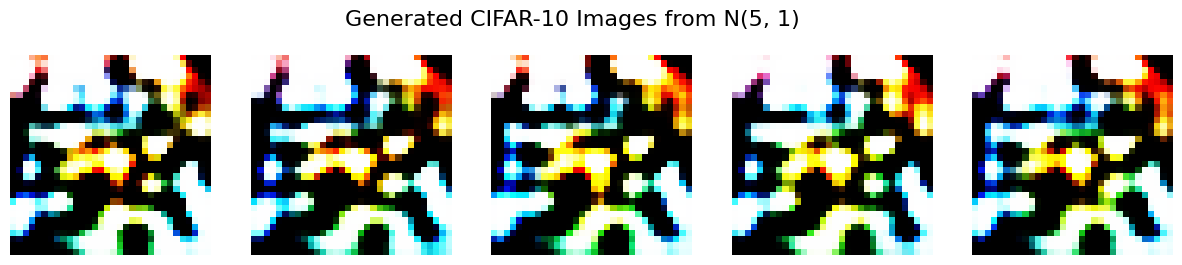

In [134]:
model.eval()
with torch.no_grad():
    noise = torch.randn(5, latent_dim) + 5
    generated_images = model.decoder(noise).cpu()

generated_images = (generated_images + 1) / 2.0
generated_images = torch.clamp(generated_images, 0, 1)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(np.transpose(generated_images[i].numpy(), (1, 2, 0)))
    ax.axis('off')
plt.suptitle('Generated CIFAR-10 Images from N(5, 1)', fontsize=16)
plt.show()